<ipython-input-2-b59aa6c2fcb3>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


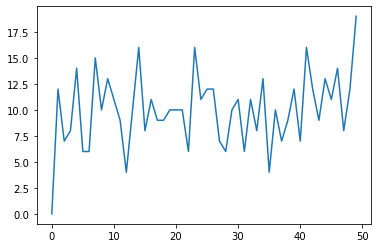

In [2]:
# Another useful thing to do with numpy.histogram is to plot the output as the x and y coordinates on a linegraph.
# For example:
import matplotlib.pyplot as plt
import numpy as np
arr = np.random.randint(1, 51, 500)
y, x = np.histogram(arr, bins=np.arange(51))
fig, ax = plt.subplots()
ax.plot(x[:-1], y)
fig.show()
# This can be a useful way to visualize histograms where you would like a higher level of granularity without bars everywhere.
# Very useful in image histograms for identifying extreme pixel values.

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
40.5


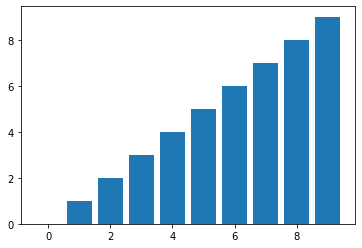

In [1]:
%matplotlib inline
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import boost_histogram as bh
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from lmfit.models import *
from lmfit import Model, Parameters

from scipy import integrate
x = np.arange(0, 10)
y = x
z = integrate.simps(y, x)
print(x)
print(y)
plt.bar(x,y)
print(z)

In [2]:
import sys
from scipy import integrate
xs = np.linspace(-0.06, 0.08 , 300, retstep = True)
print(xs)
# total = integrate.simps(out.eval(x=xs))


(array([-6.00000000e-02, -5.95317726e-02, -5.90635452e-02, -5.85953177e-02,
       -5.81270903e-02, -5.76588629e-02, -5.71906355e-02, -5.67224080e-02,
       -5.62541806e-02, -5.57859532e-02, -5.53177258e-02, -5.48494983e-02,
       -5.43812709e-02, -5.39130435e-02, -5.34448161e-02, -5.29765886e-02,
       -5.25083612e-02, -5.20401338e-02, -5.15719064e-02, -5.11036789e-02,
       -5.06354515e-02, -5.01672241e-02, -4.96989967e-02, -4.92307692e-02,
       -4.87625418e-02, -4.82943144e-02, -4.78260870e-02, -4.73578595e-02,
       -4.68896321e-02, -4.64214047e-02, -4.59531773e-02, -4.54849498e-02,
       -4.50167224e-02, -4.45484950e-02, -4.40802676e-02, -4.36120401e-02,
       -4.31438127e-02, -4.26755853e-02, -4.22073579e-02, -4.17391304e-02,
       -4.12709030e-02, -4.08026756e-02, -4.03344482e-02, -3.98662207e-02,
       -3.93979933e-02, -3.89297659e-02, -3.84615385e-02, -3.79933110e-02,
       -3.75250836e-02, -3.70568562e-02, -3.65886288e-02, -3.61204013e-02,
       -3.56521739e-02, 

In [5]:
import numpy as np
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

In [9]:
from lmfit import Model
my_model = Model(gaussian)
print('parameter names: {}'.format(my_model.param_names))
print('independent variables: {}'.format(my_model.independent_vars))

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 401
    # variables        = 3
    chi-square         = 29.9943157
    reduced chi-square = 0.07536260
    Akaike info crit   = -1033.77437
    Bayesian info crit = -1021.79248
[[Variables]]
    amplitude:  30.3135620 +/- 0.15712686 (0.52%) (init = 43.62238)
    center:     9.24277047 +/- 0.00737496 (0.08%) (init = 9.25)
    sigma:      1.23218359 +/- 0.00737496 (0.60%) (init = 1.35)
    fwhm:       2.90157056 +/- 0.01736670 (0.60%) == '2.3548200*sigma'
    height:     9.81457817 +/- 0.05087283 (0.52%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.577


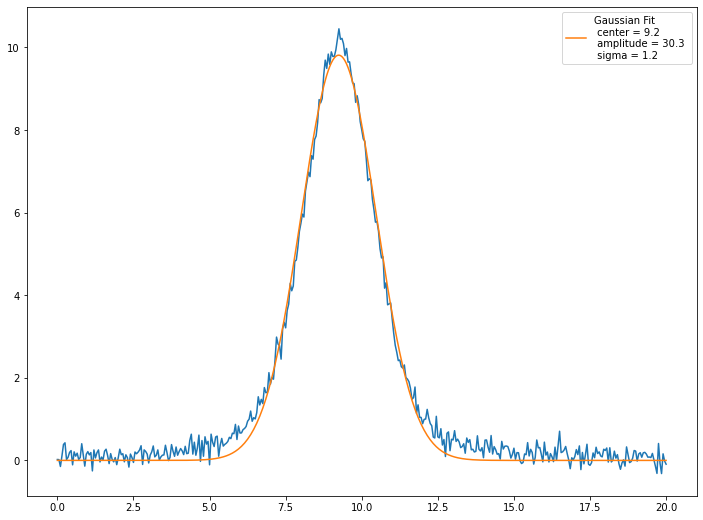

In [55]:
from numpy import loadtxt

from lmfit.models import GaussianModel
plt.figure(figsize=(12,9))
data = loadtxt('test_peak.dat')
x = data[:, 0] # it is all the data in 1st column [index 0]
y = data[:, 1] # it is all the data in 2nd column
plt.plot(x,y)
# plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
plt.plot(x, out.eval(params=out.params, x=x), alpha=0.9, label=f"Gaussian Fit \n center = {out.params['center'].value:0.1f}\n amplitude = {out.params['amplitude'].value:0.1f} \n sigma = {out.params['sigma'].value:0.1f}")

print(out.fit_report(min_correl=0.25))
plt.legend()
plt.show()

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 401
    # variables        = 3
    chi-square         = 53.7535387
    reduced chi-square = 0.13505914
    Akaike info crit   = -799.830322
    Bayesian info crit = -787.848438
[[Variables]]
    amplitude:  38.9727645 +/- 0.31386183 (0.81%) (init = 54.52798)
    center:     9.24438944 +/- 0.00927619 (0.10%) (init = 9.25)
    sigma:      1.15483925 +/- 0.01315659 (1.14%) (init = 1.35)
    fwhm:       2.30967850 +/- 0.02631318 (1.14%) == '2.0000000*sigma'
    height:     10.7421156 +/- 0.08633945 (0.80%) == '0.3183099*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.709


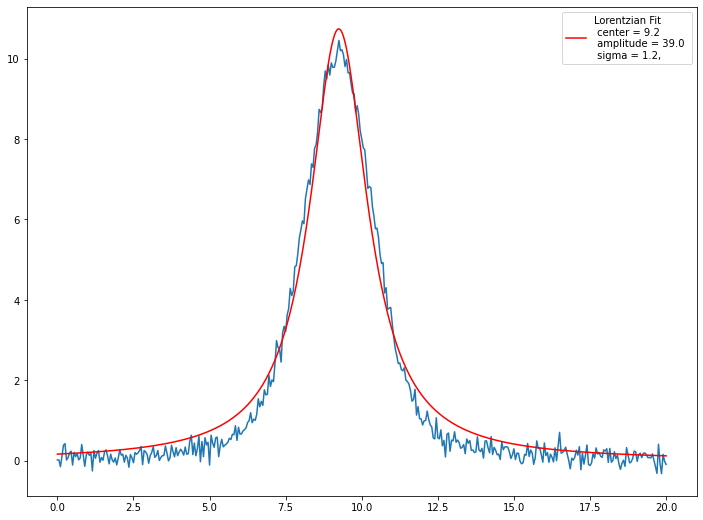

In [74]:

from lmfit.models import LorentzianModel
plt.figure(figsize=(12,9))
data = loadtxt('test_peak.dat')
x = data[:, 0] # it is all the data in 1st column [index 0]
y = data[:, 1] # it is all the data in 2nd column
plt.plot(x,y)
# plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

mod = LorentzianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
plt.plot(x, out.eval(params=out.params, x=x), 'r-' ,label=f"Lorentzian Fit \n center = {out.params['center'].value:0.1f}\n amplitude = {out.params['amplitude'].value:0.1f} \n sigma = {out.params['sigma'].value:0.1f},")

print(out.fit_report(min_correl=0.25))
plt.legend()
plt.show()

In [62]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 401
    # variables        = 3
    chi-square         = 14.5448627
    reduced chi-square = 0.03654488
    Akaike info crit   = -1324.00615
    Bayesian info crit = -1312.02427
[[Variables]]
    amplitude:  35.7554146 +/- 0.13861321 (0.39%) (init = 65.43358)
    center:     9.24411150 +/- 0.00505482 (0.05%) (init = 9.25)
    sigma:      0.73015627 +/- 0.00368460 (0.50%) (init = 0.8775)
    gamma:      0.73015627 +/- 0.00368460 (0.50%) == 'sigma'
    fwhm:       2.62950494 +/- 0.00806900 (0.31%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     10.2203969 +/- 0.03009415 (0.29%) == '(amplitude/(max(2.220446049250313e-16, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(2.220446049250313e-16, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.651


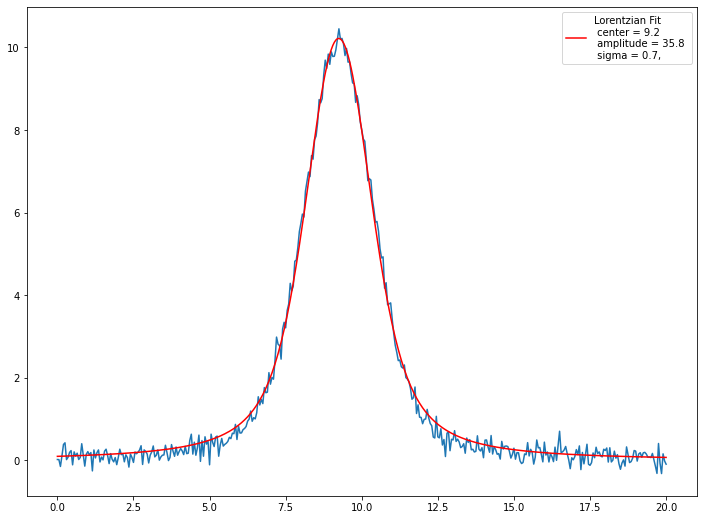

In [75]:
from lmfit.models import VoigtModel
plt.figure(figsize=(12,9))
data = loadtxt('test_peak.dat')
x = data[:, 0] # it is all the data in 1st column [index 0]
y = data[:, 1] # it is all the data in 2nd column
plt.plot(x,y)
# plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

mod =VoigtModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
plt.plot(x, out.eval(params=out.params, x=x), 'r-' ,label=f"Lorentzian Fit \n center = {out.params['center'].value:0.1f}\n amplitude = {out.params['amplitude'].value:0.1f} \n sigma = {out.params['sigma'].value:0.1f},")

print(out.fit_report(min_correl=0.25))
plt.legend()
plt.show()

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 401
    # variables        = 3
    chi-square         = 14.5448627
    reduced chi-square = 0.03654488
    Akaike info crit   = -1324.00615
    Bayesian info crit = -1312.02427
[[Variables]]
    amplitude:  35.7554146 +/- 0.13861321 (0.39%) (init = 65.43358)
    center:     9.24411150 +/- 0.00505482 (0.05%) (init = 9.25)
    sigma:      0.73015627 +/- 0.00368460 (0.50%) (init = 0.8775)
    gamma:      0.73015627 +/- 0.00368460 (0.50%) == 'sigma'
    fwhm:       2.62950494 +/- 0.00806900 (0.31%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     10.2203969 +/- 0.03009415 (0.29%) == '(amplitude/(max(2.220446049250313e-16, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(2.220446049250313e-16, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.651


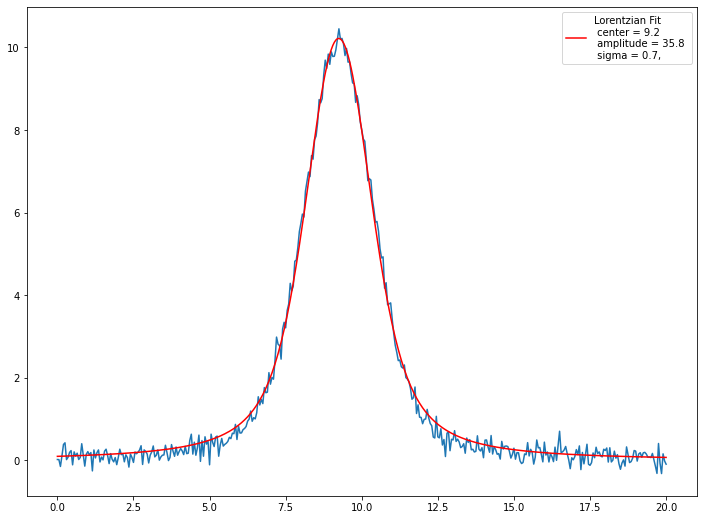

In [77]:
plt.figure(figsize=(12,9))
data = loadtxt('test_peak.dat')
x = data[:, 0] # it is all the data in 1st column [index 0]
y = data[:, 1] # it is all the data in 2nd column
plt.plot(x,y)
# plt.errorbar(x,y,yerr=stats.sem(y), fmt='.', zorder=1)

mod =VoigtModel()
pars = mod.guess(y, x=x)
pars['gamma'].set(value=0.7, vary=True, expr='')
plt.plot(x, out.eval(params=out.params, x=x), 'r-' ,label=f"Lorentzian Fit \n center = {out.params['center'].value:0.1f}\n amplitude = {out.params['amplitude'].value:0.1f} \n sigma = {out.params['sigma'].value:0.1f},")

print(out.fit_report(min_correl=0.25))
plt.legend()
plt.show()


In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [80]:
from scipy import integrate
help(integrate.simps)

Help on function simps in module scipy.integrate._quadrature:

simps(y, x=None, dx=1, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals. The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : int, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trapezoidal r

In [1]:
df['percentage'].head()
46.5
44.2
100.0
42.12

NameError: name 'df' is not defined